In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial

STARTING_CASH = 100000
ALLOWED_DRIFT = 0.05
MINKOWSKI_P = 2
DPI = 200
relative_path = 'C:/Users/Tiger/PycharmProjects/BettermentCaseStudy'

returns_df = pd.read_csv(relative_path + '/portfolio_returns.csv', index_col=0, parse_dates=True)
tickers = returns_df.columns
dates = returns_df.index
initial_weights = pd.DataFrame(dict(zip(tickers, [0.25, 0.25, 0.125, 0.125, 0.04, 0.035, 0.125, 0.05])), index=[dates[0]])

In [23]:
def minkowski_distance(arr_1, arr_2, p):
    return (sum(abs(arr_1 - arr_2)**p))**(1/p)

minkowski_optimal = partial(minkowski_distance, arr_2 = initial_weights.values[0], p = MINKOWSKI_P)

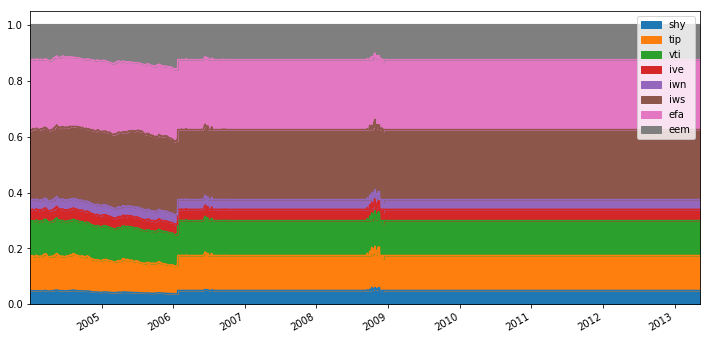

In [24]:
# NON REBALANCED PORTFOLIO
cum_returns_df = (returns_df+1).cumprod()
non_rebalance_df = (cum_returns_df * STARTING_CASH) * initial_weights.values[0]
non_rebalance_df_alloc = (non_rebalance_df.div(non_rebalance_df.sum(axis=1), axis = 0))
non_rebalance_df_returns = non_rebalance_df.sum(axis=1).pct_change(1)

# REBALANCED PORTFOLIO
rebalance_df = non_rebalance_df.copy()
rebalance_df_alloc = non_rebalance_df_alloc.copy()

for date in dates[1:]:
    if minkowski_optimal(rebalance_df_alloc.loc[date]) > ALLOWED_DRIFT:
        rebalance_df.loc[date] = sum(rebalance_df.shift(1).loc[date] * (1 + returns_df.loc[date])) * initial_weights.values[0]
    else:
        rebalance_df.loc[date] = rebalance_df.shift(1).loc[date] * (1 + returns_df.loc[date])
    rebalance_df_alloc.loc[date] = (rebalance_df.loc[date].div(rebalance_df.loc[date].sum(), axis = 0))

rebalance_df_returns = rebalance_df.sum(axis=1).pct_change(1)

In [25]:
# MAKE AND SAVE PLOTS

# DAILY RETURNS
non_rebalance_df_returns.plot(figsize = (12,6), title = 'Daily returns of non-rebalanced portfolio',label='Daily returns')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('non_rebalance_daily_returns.png')
plt.gcf().clear()
plt.close()

rebalance_df_returns.plot(figsize = (12,6), title = 'Daily returns of rebalanced portfolio',label='Daily returns')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('rebalance_daily_returns.png')
plt.gcf().clear()
plt.close()

# WEIGHT OF ASSETS
non_rebalance_df_alloc.plot(figsize = (12,6), title = 'Weight of portfolio assets of non-rebalanced portfolio', kind = 'area')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('non_rebalance_weight')
plt.gcf().clear()
plt.close()

rebalance_df_alloc.plot(figsize = (12,6), title = 'Weight of portfolio assets of rebalanced portfolio', kind = 'area')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('rebalance_weight')
plt.gcf().clear()
plt.close()

# PORTFOLIO RETURNS
non_rebalance_df.sum(axis=1).plot(figsize = (12,6), title = 'Value of portfolio', label = 'Value of portfolio')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('non_rebalance_value')
plt.gcf().clear()
plt.close()

rebalance_df.sum(axis=1).plot(figsize = (12,6), title = 'Value of portfolio', label = 'Value of portfolio')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('rebalance_value')
plt.gcf().clear()
plt.close()